In [53]:
import math
import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from tqdm import tqdm_notebook as tqdm

In [54]:
def readData(fileName):
    data = pd.read_csv(fileName)
    return data

In [55]:
data = readData('PrepeocessedFile.csv')

In [56]:
#data['tweets']= data['tweets'].apply(list)
data['label'].value_counts()

 1    1229
-1     293
 0     145
Name: label, dtype: int64

In [57]:
xData = data.iloc[:,0]
yLabel = data.iloc[:,1]

# Vectorized data 

In [6]:
vectorizedType = ['CV_1G','CV_2G','CV_3G','TV_1G','TV_2G','TV_3G']
accuracyList =[]
precisionList =[]
recallList =[]
f1ScoreList = []

In [7]:
def plotCount(words,wordCount):
    plt.figure(figsize=(8,6))
    plt.bar(words[:10],wordCount[:10])
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top words - Count Vectorizer')
    plt.show()

In [8]:
def testVectorizationNaiveBias(vectorisedData,yLabel):
    xTrain, xTest, yTrain, yTest = train_test_split(vectorisedData, yLabel, test_size=0.25, random_state=27)
    #initialize Model
    NaiveModel = GaussianNB()
    NaiveModel.fit(xTrain,yTrain)
    predictedTrain = NaiveModel.predict(xTrain)
    predictedTest = NaiveModel.predict(xTest)
    accuracyTest = accuracy_score(predictedTest,list(yTest))
    precisionTest  = precision_score(predictedTest,list(yTest),average = 'macro')
    recallTest = recall_score(predictedTest,list(yTest),average = 'macro')
    f1Score = f1_score(predictedTest,list(yTest),average = 'macro')
    print("Accuracy on Training",accuracy_score(predictedTrain,list(yTrain)))
    print("Accuracy on Testing Set",accuracyTest)
    print("Precision on Testing Set",precisionTest)
    print("Recall on Testing Set",recallTest)
    print("F1 score on Testing Set",f1Score)
    return accuracyTest,precisionTest,recallTest,f1Score

### Vectorized with CountVector

In [9]:
def countVectorize(xData,ngramRange):
    cv=CountVectorizer(decode_error='ignore',lowercase=True,analyzer = 'word',ngram_range = ngramRange,max_features = 600 )
    x_traincv=cv.fit_transform(xData)
    x_trainCountVector = x_traincv.toarray()
    columnsName = cv.get_feature_names()
    ColwiseSum=x_trainCountVector.sum(axis=0)
    wordCountPair = sorted(zip(columnsName,ColwiseSum),key=lambda pair: pair[1],reverse=True)
    word = [x for x,y in wordCountPair]
    counts = [y for x,y in wordCountPair]
    plotCount(word,counts)
    return x_trainCountVector

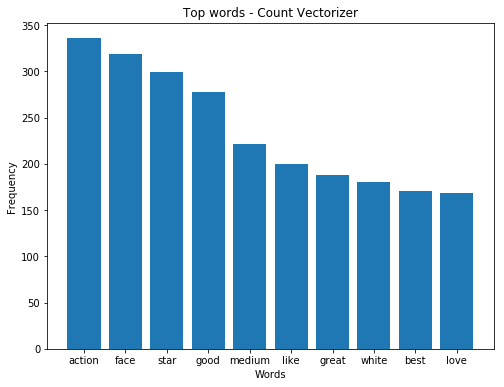

Accuracy on Training 0.7488
Accuracy on Testing Set 0.6426858513189448
Precision on Testing Set 0.5408965922604553
Recall on Testing Set 0.6539170184764737
F1 score on Testing Set 0.5570728131741257


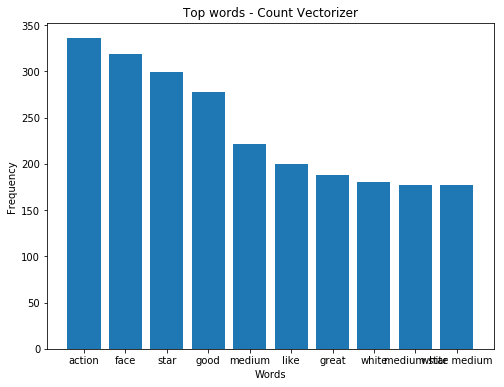

Accuracy on Training 0.7344
Accuracy on Testing Set 0.6306954436450839
Precision on Testing Set 0.5320705313095747
Recall on Testing Set 0.6023329118331593
F1 score on Testing Set 0.538874338219174


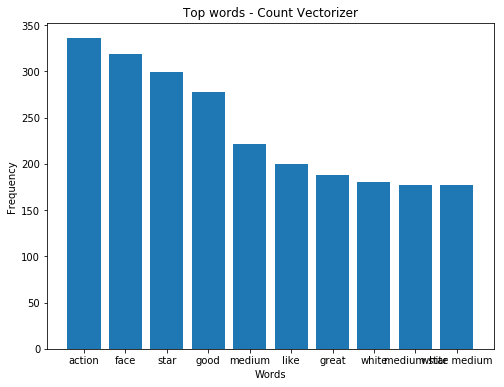

Accuracy on Training 0.7192
Accuracy on Testing Set 0.6115107913669064
Precision on Testing Set 0.5270520768184956
Recall on Testing Set 0.576122148638705
F1 score on Testing Set 0.5245378861144935


In [10]:
ngramList = [(1,1),(1,2),(1,3)]
for ngramrange in ngramList:
    vectorisedData = countVectorize(xData,ngramrange)
    accuracyTest,precisionTest,recallTest,f1Score = testVectorizationNaiveBias(vectorisedData,yLabel)
    accuracyList.append(accuracyTest)
    precisionList.append(precisionTest)
    recallList.append(recallTest)
    f1ScoreList.append(f1Score)

### Vectorized with tfidfVectorized

In [11]:
def tfidfVectorize(xData,ngramRange):
    cv=TfidfVectorizer(decode_error='ignore',lowercase=True,analyzer = 'word',ngram_range = ngramRange,max_features = 600 )
    x_traincv=cv.fit_transform(xData)
    x_trainCountVector = x_traincv.toarray()
    columnsName = cv.get_feature_names()
    ColwiseSum=x_trainCountVector.sum(axis=0)
    wordCountPair = sorted(zip(columnsName,ColwiseSum),key=lambda pair: pair[1],reverse=True)
    word = [x for x,y in wordCountPair]
    counts = [y for x,y in wordCountPair]
    plotCount(word,counts)
    return x_trainCountVector

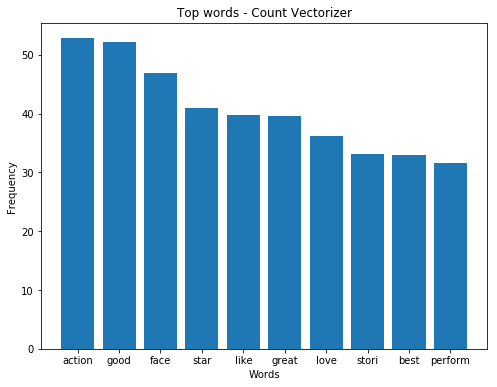

Accuracy on Training 0.7456
Accuracy on Testing Set 0.6426858513189448
Precision on Testing Set 0.5443978395798127
Recall on Testing Set 0.6558626124290101
F1 score on Testing Set 0.5588183797319485


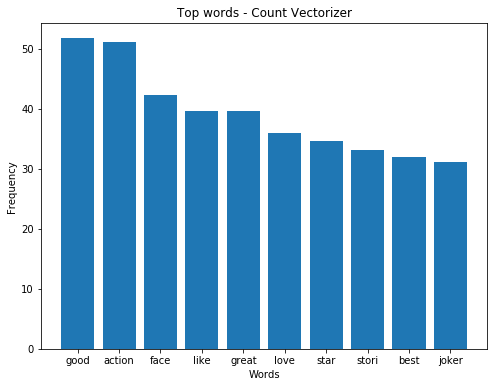

Accuracy on Training 0.7384
Accuracy on Testing Set 0.6306954436450839
Precision on Testing Set 0.5320705313095747
Recall on Testing Set 0.6023329118331593
F1 score on Testing Set 0.538874338219174


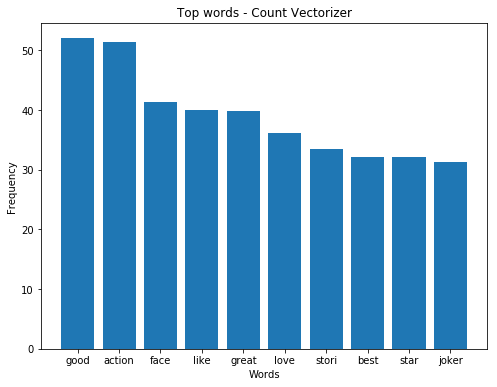

Accuracy on Training 0.7256
Accuracy on Testing Set 0.6139088729016786
Precision on Testing Set 0.5281170395448003
Recall on Testing Set 0.5768915879442195
F1 score on Testing Set 0.5257855907684449


In [12]:
ngramList = [(1,1),(1,2),(1,3)]
for ngramrange in ngramList:
    vectorisedData = tfidfVectorize(xData,ngramrange)
    accuracyTest,precisionTest,recallTest,f1Score = testVectorizationNaiveBias(vectorisedData,yLabel)
    accuracyList.append(accuracyTest)
    precisionList.append(precisionTest)
    recallList.append(recallTest)
    f1ScoreList.append(f1Score)

In [13]:
def autolabel(ax,rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = float("{0:.2f}".format(rect.get_height()))
        
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [14]:
def plotComparisionGraph(vectorizedType,accuracyList,precisionList,recallList,f1ScoreList,endValue):
    
    print(accuracyList)
    ind = np.array([i for i in range(3,endValue,3)])  # the x locations for the groups
    print(ind)
    width = 0.55  # the width of the bars
    
    fig, ax = plt.subplots(figsize = (8,6) )
    rects1 = ax.bar(ind- (1.5*width) , accuracyList, width,label='Accuracy')  #yerr=men_std
    rects2 = ax.bar(ind- width/2, precisionList, width, label='Precision') #yerr=women_std,
    rects3 = ax.bar(ind+ width/2, recallList, width, label='Recall') #yerr=women_std,
    rects4 = ax.bar(ind+ (1.5*width), f1ScoreList, width, label='F1-Score') #yerr=women_std,
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Comparision between different metrics')
    ax.set_xticks(ind)
    ax.set_xticklabels(vectorizedType)
    ax.legend(loc='upper center', bbox_to_anchor=(0.9, 0.5), ncol=1) #shadow=True
        
    autolabel(ax,rects1, "center")
    autolabel(ax,rects2, "center")
    autolabel(ax,rects3, "center")
    autolabel(ax,rects4, "center")    
    
    
    fig.tight_layout()
    plt.show()

[0.6426858513189448, 0.6306954436450839, 0.6115107913669064, 0.6426858513189448, 0.6306954436450839, 0.6139088729016786]
[ 3  6  9 12 15 18]


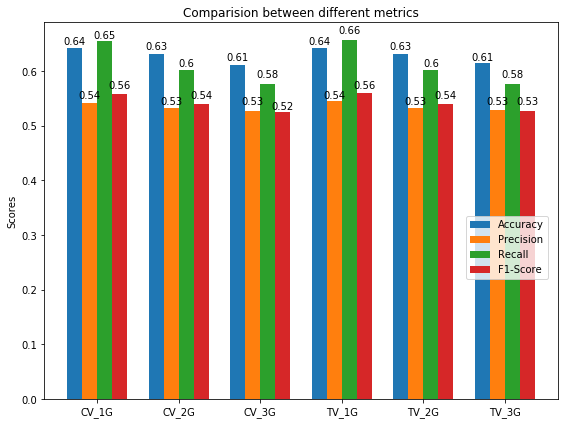

In [15]:
plotComparisionGraph(vectorizedType,accuracyList,precisionList,recallList,f1ScoreList,19)

### DocToVec vectorization

In [16]:
tt = TweetTokenizer()
tokenizedData = xData.apply(tt.tokenize)

In [17]:
def extractVector(model,rows,col):
    vector = np.zeros((rows,col))
    for i in range(rows):
        vector[i] = model.docvecs[i]
    return vector

In [18]:
def docToVec(vec_type,tokenizedData):
    max_epochs = 10
    vec_size = 200
    alpha = 0.0025
    #tagging the words to give tags 
    taggedData = [TaggedDocument(data, tags=[str(i)]) for i,data in enumerate(tokenizedData)]
    #Using DoctoVec model
    modle = None
    if vec_type == 'DBOW':
        model = Doc2Vec(dm =0,vector_size=vec_size,alpha=alpha,negative  = 5,min_alpha=0.00025,min_count=1,workers = 3)
    elif vec_type == 'DMC':
        model = Doc2Vec(dm =0,dm_concat=1,vector_size=vec_size,alpha=alpha,negative  = 5
                        ,min_alpha=0.00025,min_count=1,workers = 3)
    else:
        model = Doc2Vec(dm=1,dm_mean=1,vector_size=vec_size,alpha=alpha,negative  = 5
                        ,min_alpha=0.00025,min_count=1,workers = 3)
        
    model.build_vocab(taggedData)

    for epoch in tqdm(range(max_epochs)):
        model.train(taggedData,total_examples=model.corpus_count,epochs=model.iter)
        model.alpha -= 0.0002
        model.min_alpha = model.alpha

    #retreve Vectors
    return extractVector(model,len(taggedData),vec_size)

In [19]:
doc2VecType = ['DBOW','DMC','DMM']
daccuracyList =[]
dprecisionList =[]
drecallList =[]
df1ScoreList = []
for i in range(3):
    vectorizedData = docToVec(doc2VecType[2],tokenizedData)
    accuracy,Precison,Recall,f1 = testVectorizationNaiveBias(vectorisedData,yLabel)
    daccuracyList.append(accuracyTest)
    dprecisionList.append(precisionTest)
    drecallList.append(recallTest)
    df1ScoreList.append(f1Score)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).



Accuracy on Training 0.7256
Accuracy on Testing Set 0.6139088729016786
Precision on Testing Set 0.5281170395448003
Recall on Testing Set 0.5768915879442195
F1 score on Testing Set 0.5257855907684449


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).



Accuracy on Training 0.7256
Accuracy on Testing Set 0.6139088729016786
Precision on Testing Set 0.5281170395448003
Recall on Testing Set 0.5768915879442195
F1 score on Testing Set 0.5257855907684449


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).



Accuracy on Training 0.7256
Accuracy on Testing Set 0.6139088729016786
Precision on Testing Set 0.5281170395448003
Recall on Testing Set 0.5768915879442195
F1 score on Testing Set 0.5257855907684449


[0.6139088729016786, 0.6139088729016786, 0.6139088729016786]
[3 6 9]


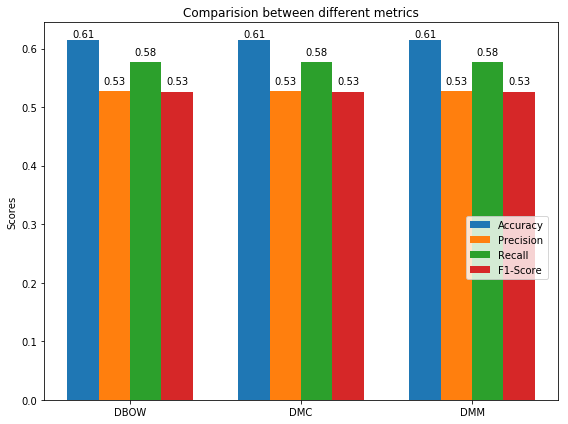

In [20]:
plotComparisionGraph(doc2VecType,daccuracyList,dprecisionList,drecallList,df1ScoreList,10)

### Finally taking TFIDF with 1-Gram 

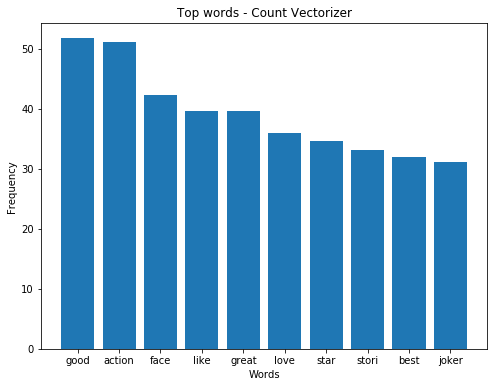

In [58]:
vectorisedData = tfidfVectorize(xData,(1,2))
vectorisedData = pd.DataFrame(vectorisedData)

# Dealing with unbalances dataset

### Note Plot the graph to show that there is a umbalances dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(vectorisedData, yLabel,
                                                    test_size=0.25,stratify=yLabel ,random_state=27)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1250, 600)
(417, 600)
(1250,)
(417,)


In [24]:
def HandleUnbalancedDataSet(X_train, y_train,samplesize):
    X = pd.concat([X_train, y_train], axis=1)
    xPos = X[X.label == 1]
    xNeg = X[X.label == -1]
    xNeu = X[X.label == 0]
    xPos_sampled = resample(xPos,replace=False, n_samples=samplesize,random_state=25)
    xNeg_sampled = resample(xNeg,replace=True, n_samples=samplesize,random_state=25)
    xNeu_sampled = resample(xNeu,replace=True, n_samples=samplesize,random_state=25)
    resampledData = pd.concat([xPos_sampled,xNeg_sampled,xNeu_sampled])
    print(resampledData['label'].value_counts())
    print(xPos_sampled.shape)
    xData = resampledData.iloc[:,:-1]
    yLabel = resampledData.iloc[:,-1]
    return xData,yLabel

In [25]:
samplesize = 600
#y_train.to_numpy().reshape(length,1)

xData,yLabel = HandleUnbalancedDataSet(pd.DataFrame(X_train), pd.DataFrame(y_train),samplesize)

 0    600
 1    600
-1    600
Name: label, dtype: int64
(600, 601)


In [63]:
xData =X_train 
yLabel =y_train 

In [64]:
print(xData.shape)
print(yLabel.shape)

(1250, 600)
(1250,)


# Classification

### Naive Bayes

In [65]:
def evaluationMetric(model, xData,yData):
    predictedTest = model.predict(xData)
    accuracyTest = accuracy_score(predictedTest,list(yData))
    precisionTest  = precision_score(predictedTest,list(yData),average = 'macro')
    recallTest = recall_score(predictedTest,list(yData),average = 'macro')
    f1Score = f1_score(predictedTest,list(yData),average = 'macro')
    print("Accuracy on Testing Set",accuracyTest)
    print("Precision on Testing Set",precisionTest)
    print("Recall on Testing Set",recallTest)
    print("F1 score on Testing Set",f1Score)
    return accuracyTest,precisionTest,recallTest,f1Score

In [66]:
NaiveModel = GaussianNB()
NaiveModel.fit(xData,yLabel)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
evaluationMetric(NaiveModel,X_test,y_test)

Accuracy on Testing Set 0.6067146282973621
Precision on Testing Set 0.5567267587815533
Recall on Testing Set 0.5800398161509273
F1 score on Testing Set 0.5346399294727563


(0.6067146282973621,
 0.5567267587815533,
 0.5800398161509273,
 0.5346399294727563)

### MultinomialNB 

In [68]:
MultiModel = GaussianNB()
MultiModel.fit(xData,yLabel)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
evaluationMetric(MultiModel,X_test,y_test)

Accuracy on Testing Set 0.6067146282973621
Precision on Testing Set 0.5567267587815533
Recall on Testing Set 0.5800398161509273
F1 score on Testing Set 0.5346399294727563


(0.6067146282973621,
 0.5567267587815533,
 0.5800398161509273,
 0.5346399294727563)

### SVM

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
t1  = time.time()
svmModel = SVC(kernel='linear',probability = True)
param_grid = {'C': [0.1, 1, 10,100],
              'kernel' : ['linear']
              }
gridModel = GridSearchCV(svmModel, param_grid,refit = True, verbose = 5, cv=5, n_jobs=4 ,iid = True)
cv_results = gridModel.fit(xData,yLabel.values.ravel())
print(cv_results)
t2 = time.time() -t1
print("Time taken to execute the fitting task :", t2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  18 out of  20 | elapsed:  1.3min remaining:    8.6s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)
Time taken to execute the fitting task : 85.26374959945679


In [71]:
print(cv_results.best_score_ )
print(cv_results.best_params_ )
print(cv_results.cv_results_ )
bestEstimatorSVC = cv_results.best_estimator_ 

0.756
{'C': 1, 'kernel': 'linear'}
{'mean_fit_time': array([6.28093472, 6.56495748, 6.15460739, 5.96152515]), 'std_fit_time': array([0.09756455, 0.20959627, 0.29537987, 0.13045659]), 'mean_score_time': array([0.21366811, 0.22825985, 0.18988371, 0.19408302]), 'std_score_time': array([0.00848955, 0.01670581, 0.01051763, 0.02007286]), 'param_C': masked_array(data=[0.1, 1, 10, 100],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 100, 'kernel': 'linear'}], 'split0_test_score': array([0.73705179, 0.75697211, 0.74900398, 0.73306773]), 'split1_test_score': array([0.736, 0.744, 0.712, 0.704]), 'split2_test_score': array([0.736, 0.768, 0.764, 0.772]), 'split3_test_sc

In [72]:
evaluationMetric(bestEstimatorSVC,X_test,y_test)

Accuracy on Testing Set 0.7577937649880095
Precision on Testing Set 0.41757266072334565
Recall on Testing Set 0.5872212718705921
F1 score on Testing Set 0.4301726808874456


(0.7577937649880095,
 0.41757266072334565,
 0.5872212718705921,
 0.4301726808874456)

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression(solver='lbfgs',multi_class='multinomial',penalty = 'l2')
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000]}
gridModel = GridSearchCV(logisticModel, grid_values,refit = True, verbose = 5, cv=5, n_jobs=4 ,iid = True)
cv_results = gridModel.fit(xData,yLabel.values.ravel())
print(cv_results)
t2 = time.time() -t1
print("Time taken to execute the fitting task :", t2)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)
Time taken to execute the fitting task : 100.16646146774292


In [36]:
print(cv_results.best_score_ )
print(cv_results.best_params_ )
print(cv_results.cv_results_ )
bestEstimatorLogistic = cv_results.best_estimator_ 

0.9077777777777778
{'C': 1000}
{'mean_fit_time': array([0.17828908, 0.17929134, 0.28822432, 0.74074402, 1.34657168,
       1.31738954, 1.22404618]), 'std_fit_time': array([0.018018  , 0.01413988, 0.03025092, 0.033257  , 0.01110355,
       0.02148497, 0.11838135]), 'mean_score_time': array([0.00999475, 0.00519719, 0.00759416, 0.00739665, 0.00599623,
       0.00599766, 0.00539813]), 'std_score_time': array([0.00582836, 0.00074861, 0.00287039, 0.00300495, 0.00089447,
       0.00063211, 0.00080086]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.78055556, 0.78333333, 0.81666667, 0.86666667, 0.91666667,
       0.91388889, 0.91944444]), 'split1_test_score': array([0.71666667, 0.71944444, 0.75833333, 0.84444444, 0.89722222,
      

In [37]:
evaluationMetric(bestEstimatorLogistic,X_test,y_test)

Accuracy on Testing Set 0.7122302158273381
Precision on Testing Set 0.575408356230274
Recall on Testing Set 0.5331466236943269
F1 score on Testing Set 0.5475075715019532


(0.7122302158273381, 0.575408356230274, 0.5331466236943269, 0.5475075715019532)

# Clustering

In [38]:
from sklearn.cluster import KMeans
import collections
kmeans = KMeans(n_clusters=3, random_state=0).fit(xData)
clusterPredictedLabel = kmeans.labels_

In [39]:
collections.Counter(clusterPredictedLabel)

Counter({0: 1553, 1: 173, 2: 74})

In [40]:
np.bincount(clusterPredictedLabel)

array([1553,  173,   74], dtype=int64)